## Breast cancer detection using object oriented programming (UCI database)

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.inspection import permutation_importance

##### Exploratory data analysis

In [9]:
# Exploratory analyzes

# create colnames list
colnames = ['id', 'clump_thickness', 'uniformity_cell_size',
            'uniformity_cell_shape', 'marginal_adhesion',
            'single_e_cell_size', 'bare_nuclei',
            'bland_chromatin', 'normal_nucleoli',
            'mitoses', 'class']

# read csv from url
dataframe = pd.read_csv('https://archive.ics.uci.edu/ml/'
                        'machine-learning-databases/breast-cancer-wisconsin/'
                        'breast-cancer-wisconsin.data', names = colnames)

# print info and head
dataframe.info()
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     699 non-null    int64 
 1   clump_thickness        699 non-null    int64 
 2   uniformity_cell_size   699 non-null    int64 
 3   uniformity_cell_shape  699 non-null    int64 
 4   marginal_adhesion      699 non-null    int64 
 5   single_e_cell_size     699 non-null    int64 
 6   bare_nuclei            699 non-null    object
 7   bland_chromatin        699 non-null    int64 
 8   normal_nucleoli        699 non-null    int64 
 9   mitoses                699 non-null    int64 
 10  class                  699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_e_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [36]:
# Change variable 'bare_nuclei' to int
# This variable been found to have values == ?
# remove before.
dataframe = dataframe[dataframe.bare_nuclei !='?']
dataframe['bare_nuclei'] = dataframe['bare_nuclei'].astype(str).astype(int)


In [37]:
# Verify again
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   clump_thickness        683 non-null    int64
 1   uniformity_cell_size   683 non-null    int64
 2   uniformity_cell_shape  683 non-null    int64
 3   marginal_adhesion      683 non-null    int64
 4   single_e_cell_size     683 non-null    int64
 5   bare_nuclei            683 non-null    int64
 6   bland_chromatin        683 non-null    int64
 7   normal_nucleoli        683 non-null    int64
 8   mitoses                683 non-null    int64
 9   class                  683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB


In [38]:
# Statistic summary
# UCI website describes that are no missing values
dataframe.describe()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_e_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [20]:
# Verify if response variable is imbalanced
# 2 - benign, 4 - malignant
res = (dataframe['class'].value_counts()/len(dataframe)*100)
print('Percentage of each class:\n', res)

Percentage of each class:
 2    65.522175
4    34.477825
Name: class, dtype: float64


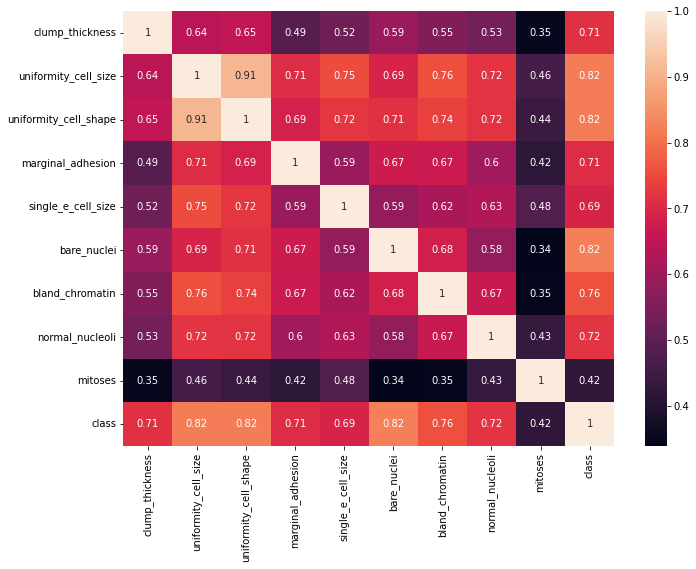

In [39]:
# Verify correlation and drop ID column
# dataframe = dataframe.drop(['id'], axis = 1)
cor = dataframe.corr()
plt.figure(figsize=(11, 8))
sns.heatmap(cor, annot=True)
plt.show()

<AxesSubplot:ylabel='Density'>

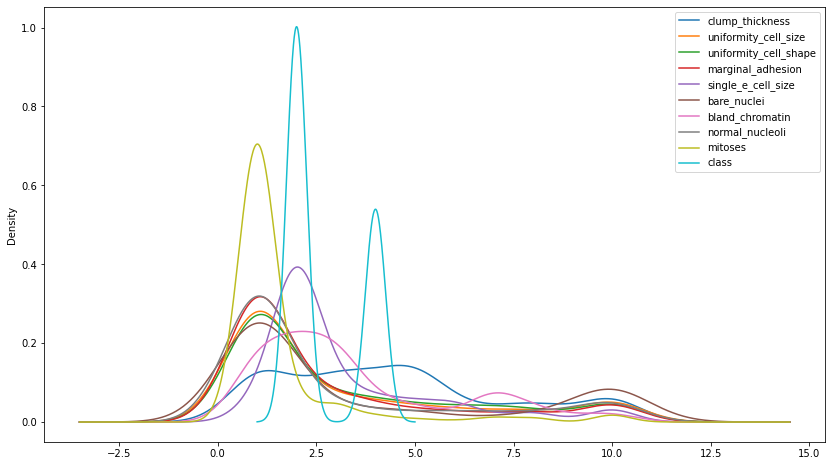

In [54]:
# Verify variables distribution
dataframe.plot(kind = 'density',
                layout = (3,3), 
                sharex = False, 
                figsize = (14,8))

<AxesSubplot:>

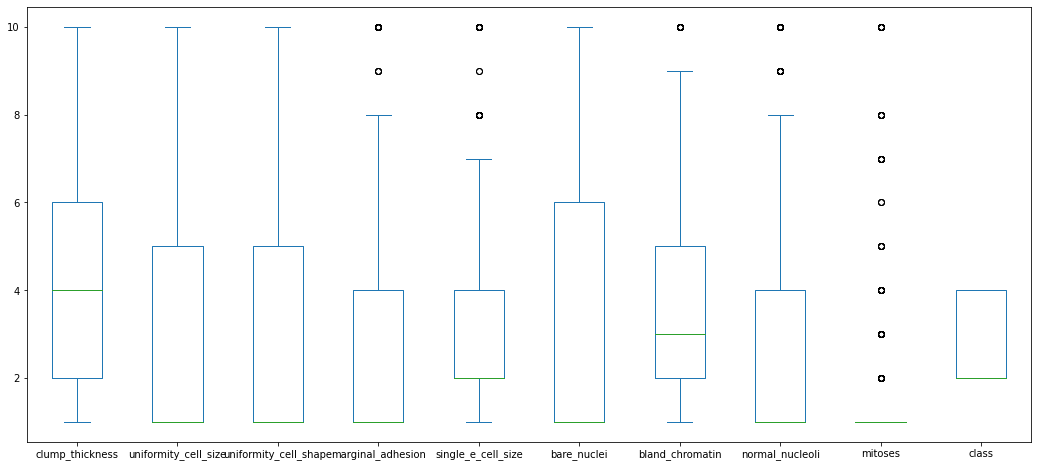

In [48]:
dataframe.plot(kind = 'box',
                layout = (3,3), 
                sharex = False, 
                sharey = False, 
                figsize = (18,8))

#### Building ML modelo - OOP 

In [2]:
class ImportData:

    def load_data(self, url, colnames):
        return pd.read_csv(url, names = colnames)


class DataConsistency:

    def remove_rows(self, df):
        df = df[df.bare_nuclei != '?']
        df['bare_nuclei'] = df['bare_nuclei'].astype(str).astype(int)
        return df

    def remove_outlier (self, df, zvalue):
        z = np.abs(stats.zscore(df.drop(['class'], axis=1)))
        clean_data = df[(z < zvalue).all(axis=1)]
        return clean_data
    

class DataSplit:

    def split(self, df, test_size, random_state = 1234):
        X_train, X_test, y_train, y_test = self.__holdout(df,
                                                            test_size,
                                                            random_state)
        return(X_train, X_test, y_train, y_test)

    def __holdout(self, df, test_size, random_state):
        X = df.drop(['class', 'id'], axis = 1)
        y = df[['class']]
        return train_test_split(X, y,
                                test_size = test_size,
                                random_state = random_state)

class Model:
    def model_pipe(self, X_train, y_train):
        model = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('rf', RandomForestClassifier(random_state = 1234))])
        fited = model.fit(X_train, y_train)
        return fited

class Metrics:
    def classification_metrics(self, model, X_test, y_test):

        y_pred = model.predict(X_test)
        conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
        # Confusion Matrix
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
        for i in range(conf_matrix.shape[0]):
            for j in range(conf_matrix.shape[1]):
                ax.text(x=j, y=i, s=conf_matrix[i, j],
                        va='center', ha='center', size='xx-large')
        plt.xlabel('Predictions', fontsize=18)
        plt.ylabel('Actuals', fontsize=18)
        plt.title('Confusion Matrix', fontsize=18)
        plt.show()
        # Permutation Importance
        perm_importance = permutation_importance(
            model, X_test, y_test)
        sorted_idx = perm_importance.importances_mean.argsort()
        fig = plt.figure(figsize=(15, 6))
        plt.barh(range(len(sorted_idx)),
                perm_importance.importances_mean[sorted_idx], align='center')
        plt.yticks(range(len(sorted_idx)), np.array(
            X_test.columns)[sorted_idx])
        plt.title('Permutation Importance')
        # Metrics
        print('Precision Weighted: %.3f' %
            precision_score(y_test, y_pred, average='weighted'))
        print('Recall Weighted: %.3f' %
            recall_score(y_test, y_pred, average='weighted'))
        print('F1 Score Weighted: %.3f' %
            f1_score(y_test, y_pred, average='weighted'))
        print('AUC Weighted: %.3f' %
            roc_auc_score(y_test, y_pred, average='weighted'))

/tmp/ipykernel_214/3868216431.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bare_nuclei'] = df['bare_nuclei'].astype(str).astype(int)
/home/rafaelnw/.local/lib/python3.8/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


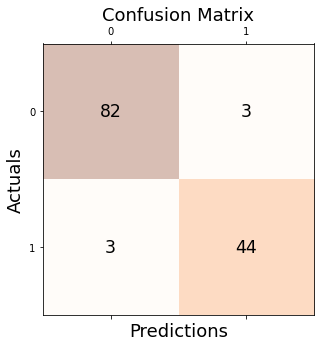

Precision Weighted: 0.955
Recall Weighted: 0.955
F1 Score Weighted: 0.955
AUC Weighted: 0.950


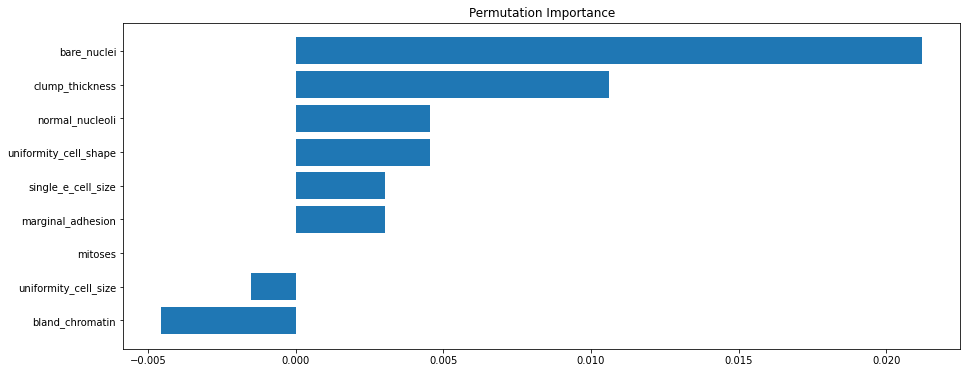

In [3]:
#Instance classes
import_data = ImportData()
data_cleaned = DataConsistency()
data_splited = DataSplit()
model = Model()
metrics = Metrics()

# Parameters
url_uci = ('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/breast-cancer-wisconsin/'
        'breast-cancer-wisconsin.data')
col_names = ['id', 'clump_thickness', 'uniformity_cell_size', 
        'uniformity_cell_shape', 'marginal_adhesion', 
        'single_e_cell_size', 'bare_nuclei', 
        'bland_chromatin', 'normal_nucleoli', 
        'mitoses', 'class']
z_score = 3.5
test_size = 0.2

#Code
#Load data
data = import_data.load_data(url = url_uci, colnames = col_names)

#Remove outlier, change to int and rows == ?
data_temp = data_cleaned.remove_rows(data)
data_clean = data_cleaned.remove_outlier(data_temp, z_score)

#Train and test sets
X_train, X_test, y_train, y_test = data_splited.split(data_clean,
                                                        test_size = test_size)

#model
random_forest = model.model_pipe(X_train = X_train, y_train = y_train)

# Metrics
metrics.classification_metrics(model = random_forest,
                                X_test = X_test,
                                y_test = y_test)